# Network Sizing Examples

In [47]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import rmsprop

import matplotlib.pyplot as plt
from scipy.misc import toimage

from sklearn import metrics

import pandas as pd
import numpy as np

from IPython.display import display, HTML, Image
from IPython.display import SVG

from PIL import Image

import os
from random import randint
keras.backend.set_image_data_format('channels_last')

## Greyscale Image (single channel)

Define input image size

In [48]:
input_shape = (32, 32, 1)
flat_input_size = input_shape[0]*input_shape[1]*input_shape[2]
num_classes = 4

Simple deep network

In [49]:
dnn_model = Sequential()
dnn_model.add(Dense(input_dim=flat_input_size, units=1000))
dnn_model.add(Activation("relu"))
dnn_model.add(Dense(units=512))
dnn_model.add(Activation("relu"))
dnn_model.add(Dense(units=256))
dnn_model.add(Activation("relu"))
dnn_model.add(Dense(units=num_classes))
dnn_model.add(Activation("softmax"))

Draw the network

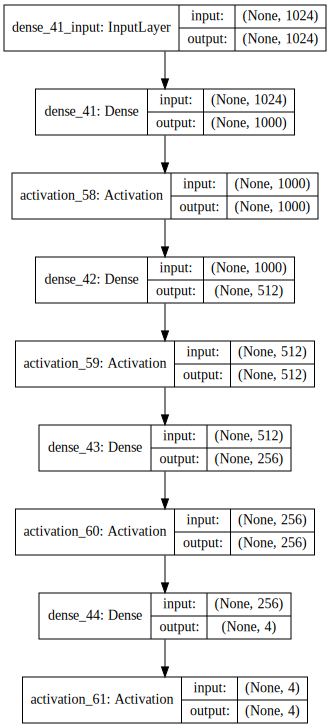

In [50]:
SVG(model_to_dot(dnn_model, show_shapes = True).create(prog='dot', format='svg'))

Calculate model size

In [51]:
dnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 1000)              1025000   
_________________________________________________________________
activation_58 (Activation)   (None, 1000)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               512512    
_________________________________________________________________
activation_59 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_60 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 4)                 1028      
__________

CNN network

In [52]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=input_shape))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Conv2D(128, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(512))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(num_classes))
cnn_model.add(Activation('softmax'))

Draw the network

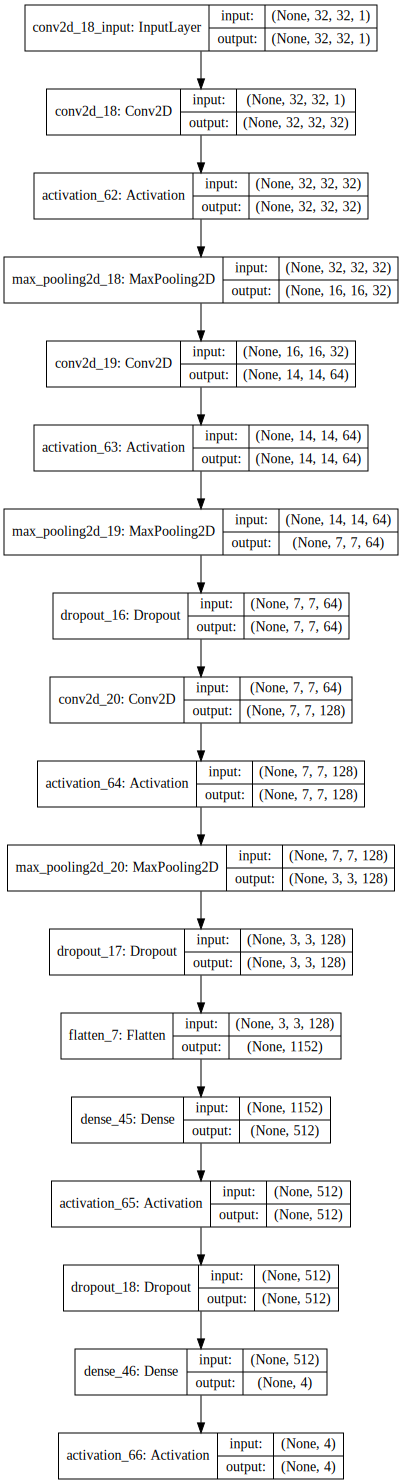

In [53]:
SVG(model_to_dot(cnn_model, show_shapes = True).create(prog='dot', format='svg'))

Calcualte network size

In [54]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
activation_62 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_63 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 7, 7, 64)          0         
__________

## Colour Image (multi channel)

Define input image size

In [55]:
input_shape = (64, 64, 3)
flat_input_size = input_shape[0]*input_shape[1]*input_shape[2]
num_classes = 4

Simple deep network

In [56]:
dnn_model = Sequential()
dnn_model.add(Dense(input_dim=flat_input_size, units=1000))
dnn_model.add(Activation("relu"))
dnn_model.add(Dense(units=512))
dnn_model.add(Activation("relu"))
dnn_model.add(Dense(units=256))
dnn_model.add(Activation("relu"))
dnn_model.add(Dense(units=num_classes))
dnn_model.add(Activation("softmax"))

Draw the network

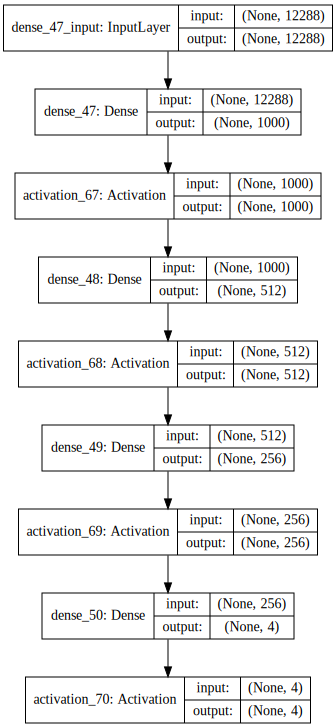

In [57]:
SVG(model_to_dot(dnn_model, show_shapes = True).create(prog='dot', format='svg'))

Calculate network size

In [58]:
dnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 1000)              12289000  
_________________________________________________________________
activation_67 (Activation)   (None, 1000)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               512512    
_________________________________________________________________
activation_68 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_69 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 1028      
__________

CNN network

In [59]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=input_shape))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(128, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(512))
cnn_model.add(Activation('relu'))
cnn_model.add(Dense(num_classes))
cnn_model.add(Activation('softmax'))

Draw the network

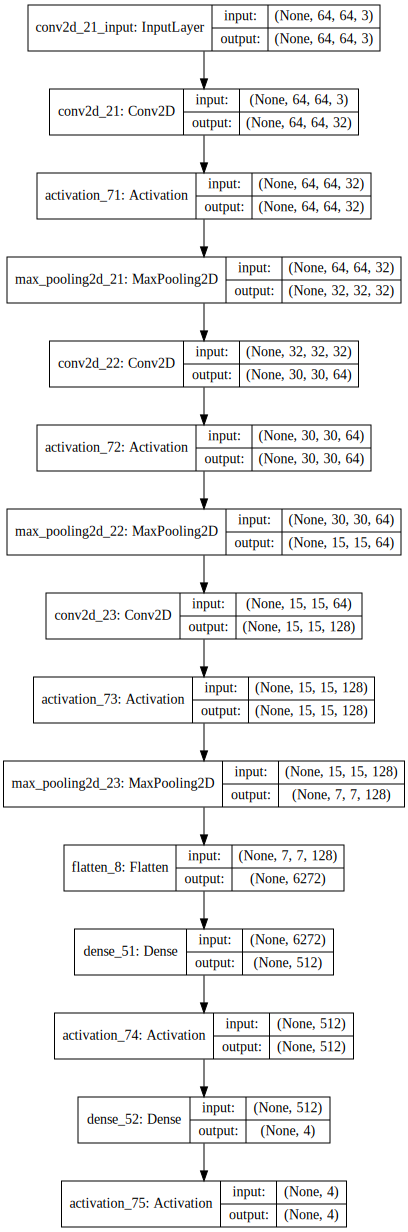

In [60]:
SVG(model_to_dot(cnn_model, show_shapes = True).create(prog='dot', format='svg'))

Calcualte network size

In [61]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_71 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_72 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)       73856     
__________

## Greyscale Image (single channel)

Define input image size

In [62]:
input_shape = (64, 64, 1)
flat_input_size = input_shape[0]*input_shape[1]*input_shape[2]
num_classes = 4

Simple deep network

In [63]:
dnn_model = Sequential()
dnn_model.add(Dense(input_dim=flat_input_size, units=2048))
dnn_model.add(Activation("relu"))
dnn_model.add(Dense(units=1024))
dnn_model.add(Activation("relu"))
dnn_model.add(Dense(units=512))
dnn_model.add(Activation("relu"))
dnn_model.add(Dense(units=num_classes))
dnn_model.add(Activation("softmax"))

Draw the network

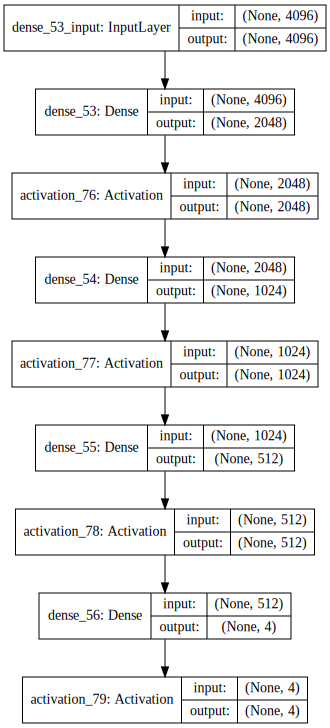

In [64]:
SVG(model_to_dot(dnn_model, show_shapes = True).create(prog='dot', format='svg'))

Calculate network size

In [65]:
dnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 2048)              8390656   
_________________________________________________________________
activation_76 (Activation)   (None, 2048)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
activation_77 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_78 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 4)                 2052      
__________

CNN network

In [66]:
cnn_model = Sequential()
cnn_model.add(Conv2D(16, (3, 3), padding='valid', strides = 1,
                 input_shape=input_shape))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
cnn_model.add(Conv2D(32, (3, 3), padding='valid', strides = 1))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
cnn_model.add(Flatten())
cnn_model.add(Dense(512))
cnn_model.add(Activation('relu'))
cnn_model.add(Dense(num_classes))
cnn_model.add(Activation('softmax'))
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
activation_80 (Activation)   (None, 62, 62, 16)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
activation_81 (Activation)   (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6272)              0         
__________

Draw the network

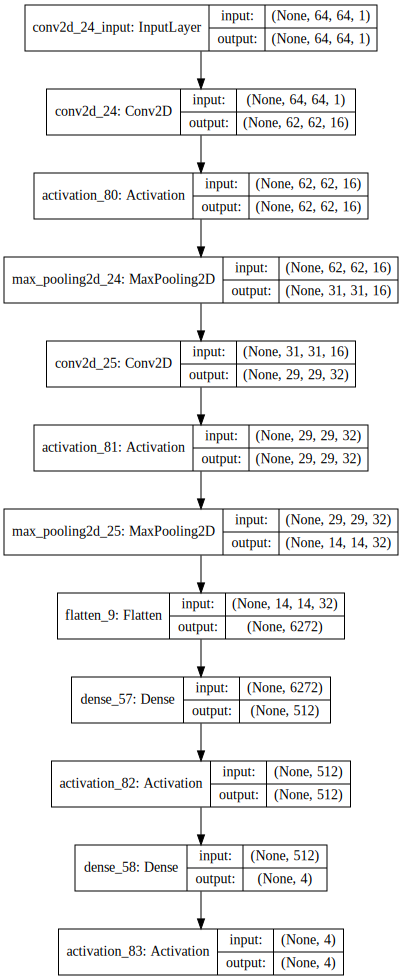

In [67]:
SVG(model_to_dot(cnn_model, show_shapes = True).create(prog='dot', format='svg'))

Calcualte network size

In [68]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
activation_80 (Activation)   (None, 62, 62, 16)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
activation_81 (Activation)   (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6272)              0         
__________